Exercise Set 6

Mohaddeseh Mozaffari

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Q1:

In [96]:
data1 = np.loadtxt("1d_data.txt")

In [99]:
def UTPCF_1d(data, dx, dr):
    """calculate un-weighted two point correlation function

    Args:
        data (1d_array): data
        dx (float): _description_
        dr (int): _description_

    Returns:
        tuple of array: tau and psi(tau) for data
    """
    N = len(data) #number od data
    npeak = 0  #number of peaks
    peakpos = []  #index of peaks

    for i in range(1,N-1):
        k1 = int((data[i]-data[i-1])/dx)
        k2 = int((data[i]-data[i+1])/dx)

        if k1>0 and k2>0: #condition for peak
            npeak += 1 
            peakpos.append(i)

    #check first point of data
    k1 = int((data[1]-data[2])/dx)
    if k1>0:
        npeak += 1
        peakpos.append(1)
        
    #check last point of data
    k2 = int((data[N-1]-data[N-2])/dx)
    if k2>0:
        npeak += 1
        peakpos.append(N-1)

    peakpos.sort()
    
    p = np.zeros(N)
    for i in range(npeak):
        for j in range(i+1, npeak):
            R = int((peakpos[i]-peakpos[j])/dr)
            p[R] += 1

    tau = []
    psi = []
    for r in range(N):
        tau.append(r*dr)
        s = (p[r]/(npeak**2/(2*N)))-1
        psi.append(s)

    return tau, psi

In [100]:
tau, psi = UTPCF_1d(data1, 0.1, 1)

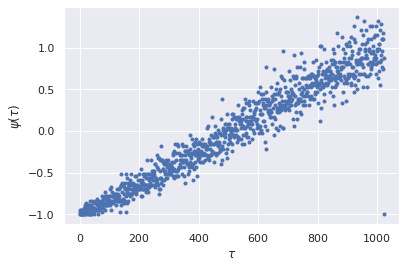

In [101]:
plt.plot(tau,psi, ".")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\psi(\tau)$")
plt.show()

# Q2:

In [4]:
data2 = np.loadtxt("2d_data.txt")

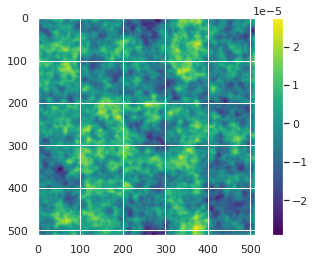

In [5]:
plt.imshow(data2, cmap="viridis")
plt.colorbar()
plt.show()

In [155]:
def UTPCF_2d(data, dr):
    """calculate un-weighted two point correlation function

    Args:
        data (2d_array): data
        dx (float): _description_
        dr (int): _description_

    Returns:
        tuple of array: tau and psi(tau) for data
    """
    N = len(data) #number od data
    npeak = 0  #number of peaks
    peakpos = []  #index of peaks


    for i in range(1, N - 1):
        for j in range(1, N - 1):
            if data[i][j] > data[i - 1][j] and data[i][j] > data[i + 1][j] and data[i][j] > data[i][j - 1] and data[i][j] > data[i][j + 1]:
                npeak += 1
                peakpos.append(np.array([i, j]))

    #check first point of data
    if data[0][0] > data[0][1] and data[0][0] > data[1][0]:
        npeak += 1
        peakpos.append(np.array([0,0]))
        
    #check last point of data
    if data[N-1][N-1] > data[N-1][N-2] and data[N-1][N-1] > data[N-2][N-1]:
        npeak += 1
        peakpos.append(np.array([N-1, N-1]))

    peakpos = np.array(peakpos)
    peakpos.sort()
    
    p = np.zeros((N,N))

    for i in range(npeak):
        for j in range(i+1,npeak):
            R1, R2 = ((peakpos[i]-peakpos[j])/dr)
            R1 = int(R1)
            R2 = int(R2)
            p[R1, R2] += 1

    psi = np.zeros((N,N))
    for r in range(N):
        for l in range(N):
            tau[r,l] = r*l*dr*dr
            s = (p[r,l]/(npeak**2/(2*N)))-1
            psi[r,l] = s

    return psi


In [156]:
psi = UTPCF_2d(data2, 1)

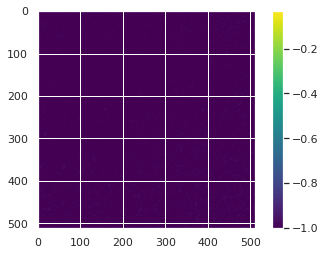

In [163]:
plt.imshow(psi, cmap="viridis")
plt.colorbar()
plt.show()

In [158]:
data3 = np.loadtxt("2d_datab.txt")

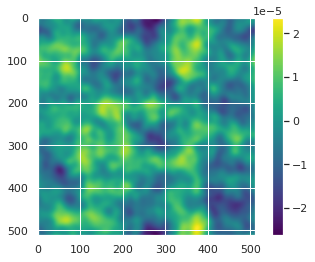

In [159]:
plt.imshow(data3, cmap="viridis")
plt.colorbar()
plt.show()

In [160]:
psi = UTPCF_2d(data3, 1)

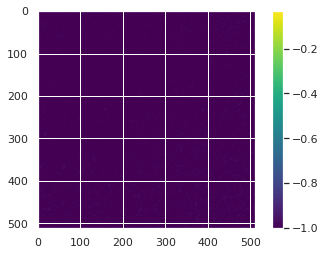

In [162]:
plt.imshow(psi, cmap="viridis")
plt.colorbar()
plt.show()